In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional
import torch.utils.data

from sklearn.model_selection import train_test_split

In [ ]:
## データ作成
numX = 10

np.random.seed(1)
#x = np.random.uniform(0, 1, numX)
x = np.linspace(0, 1, numX)
print(x)
print(len(x))

予測対象の関数を定義

In [ ]:
y = 5 * x * np.sin(2 * np.pi * x) + 4 * np.exp((x + 1) ** (-1)) + np.random.normal(loc=0.0, scale=1.0 ,size=(1,numX))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)
#ax.plot(x, y[0], c='r')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.savefig("sample_data.png")
fig.show()

In [ ]:
## モデル定義
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(1, 100)
    self.fc2 = torch.nn.Linear(100, 100)
    self.fc3 = torch.nn.Linear(100, 1)
    
    self.dropout = torch.nn.Dropout(p=0.25)

  def forward(self, x):
    x = torch.nn.functional.leaky_relu(self.fc1(x))
    x = self.dropout(x)
    x = torch.nn.functional.leaky_relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x

In [ ]:
## 学習データ準備

## 必要に応じてtrain_test_split
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.0, random_state=None)
x_train = x
y_train = y

In [ ]:
## 必要に応じて標準化
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train-y_mean)/y_std
#y_test = (y_test-y_mean)/y_std


In [ ]:
# データ形式をpytorchに合わせる
x_tensor = torch.from_numpy(x_train.reshape(-1, 1)).float()
y_tensor = torch.from_numpy(y_train.reshape(-1, 1)).float()


In [ ]:
# crate instance
net = Net()

In [ ]:
# set training mode
net.train()

In [ ]:
# set training parameters
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
num_epochs = 2000


In [ ]:
# start to train
epoch_loss = []
eval_loss = []
for epoch in range(num_epochs):
    # forward
    outputs = net(x_tensor)
    
    # calculate loss
    loss = criterion(outputs, y_tensor)
    
    # update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    x_test = np.random.random(10)
    x_test = torch.from_numpy(x_test.reshape(-1, 1)).float()
    y_test = net(x_test)
    y_true = 5*x_test * np.sin(2*np.pi*x_test) + 2 * np.exp(2*x_test)
    y_true=(y_true-y_mean)/y_std
    test_loss = criterion(y_test, y_true)
    
    # save loss of this epoch
    epoch_loss.append(loss.data.numpy().tolist())
    eval_loss.append(test_loss.data.numpy().tolist())

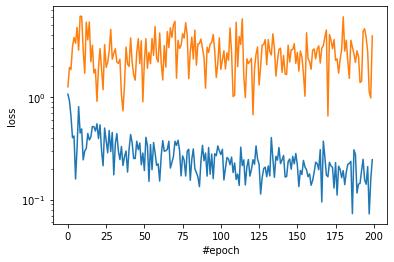

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
#ax.plot(list(range(len(epoch_loss))), epoch_loss)
#ax.plot(list(range(len(eval_loss))), eval_loss)
ax.plot(list(range(200)), epoch_loss[:200])
ax.plot(list(range(200)), eval_loss[:200])
ax.set_yscale('log')
ax.set_xlabel('#epoch')
ax.set_ylabel('loss')
fig.savefig("learning curve.png")
fig.show()


In [ ]:
# set validaiton mode
net.eval()


Net(
  (fc1): Linear(in_features=1, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
# generate new 'x'
x_new = np.linspace(0,1, numX)
x_new_tensor = torch.from_numpy(x_new.reshape(-1, 1)).float()


In [ ]:
# predict 'y'
with torch.no_grad():
    y_pred_tensor = net(x_new_tensor)


In [ ]:
# convert tensor to numpy
y_pred = y_pred_tensor.data.numpy()


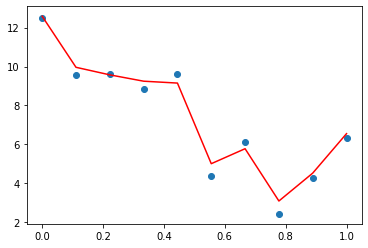

In [ ]:
# plots
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)
ax.plot(x_new, y_pred* y_std+y_mean, c='r')
#ax.scatter(x, y_pred* y_std+y_mean)
fig.savefig("prediction.png")
fig.show()

In [ ]:
yy = y_pred* y_std+y_mean
print(np.average(np.sqrt( (y[0]-yy[:,0])*(y[0]-yy[:,0]) )) )
print(y[0])
print(yy[:,0])
print(y[0] - yy[:,0])

0.3561602566507279
[12.49747268  9.58376026  9.63156071  8.83840712  9.6187393   4.35603393
  6.14653562  2.4292038   4.2539382   6.34551471]
[12.583056   9.960738   9.572311   9.246649   9.150322   5.0089903
  5.778191   3.0926123  4.5247016  6.5531745]
[-0.08558377 -0.37697792  0.05924931 -0.40824167  0.46841734 -0.65295636
  0.36834453 -0.66340847 -0.2707634  -0.20765979]


In [ ]:
y = 5*x * np.sin(2*np.pi*x) + 2 * np.exp(2*x) + np.random.normal(loc=0.0, scale=1.0 ,size=(1,numX))

In [ ]:
y_ = 5*x * np.sin(2*np.pi*x) + 2 * np.exp(2*x) + np.random.normal(loc=0.0, scale=0.0 ,size=(1,numX))

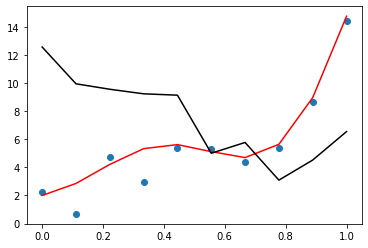

In [ ]:
# plots
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)
ax.plot(x, y_[0], 'r')
ax.plot(x_new, y_pred* y_std+y_mean, c='k')
fig.savefig("prediction.png")
fig.show()

In [ ]:
#x_test = np.random.random(10)
x_test = np.linspace(0,1, 1000)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:

x_test_tensor = torch.from_numpy(x_test.reshape(-1, 1)).float()
y_test_tensor = net(x_test_tensor)
y_test = y_test_tensor.data.numpy()
y_test = y_test * y_std+y_mean

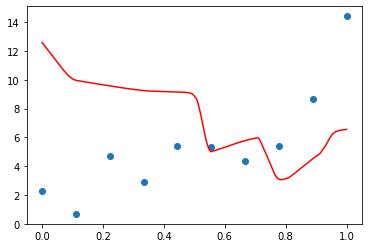

In [ ]:
# plots
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x, y)
ax.plot(x_test, y_test, c='r')
#ax.scatter(x, y_pred* y_std+y_mean)
fig.savefig("prediction.png")
fig.show()

In [ ]:
yy = y_test
print(np.average(np.sqrt( (y[0]-yy[:,0])*(y[0]-yy[:,0]) )) )
print(y[0])
print(yy[:,0])
print(y[0] - yy[:,0])

ValueError: ignored